# Quantum Connection Setup

In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().resolve() / "src"))

from scenarios import *

Zero length loss fibre (5km) p_ge = 0.5
Zero length loss fibre (20km) p_ge = 0.5
Zero length loss fibre (50km) p_ge = 0.5
High length loss fibre (5km) p_ge = 0.5623413251903491
High length loss fibre (20km) p_ge = 0.1
High length loss fibre (50km) p_ge = 0.0031622776601683794
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (5km) p_ge = 0.7943282347242815
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (20km) p_ge = 0.3981071705534972
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (50km) p_ge = 0.1
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (5km) p_ge = 0.7943282347242815
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (20km) p_ge = 0.3981071705534972
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (50km) p_ge = 0.1
High-Noise fibre (T1 = 50km travel time) (5km) p_ge = 0.7943282347242815
High-Noise fibre (T1 = 50km travel time) (20km) p_ge = 0.3981071705534972
High-Noise fibre (T1 = 50km travel time) (50km) p_ge = 0.1
Ext

# Analysis Functions

In [2]:
import re
def get_img_path(label:str):
    # resolve output directory relative to this file (avoid changing cwd)
    base = Path.cwd().resolve()  # repo root
    subfolder = re.sub(r'\s+', '_', label.splitlines()[0])
    outdir = base / "img" / subfolder
    label = label.split(maxsplit=2)[0] + "_" + label.splitlines()[1]
    outdir.mkdir(parents=True, exist_ok=True)
    label = re.sub(r'\s+', '_', str(label)).strip()          # collapse whitespace/newlines
    label = re.sub(r'[^A-Za-z0-9._-]', '_', label)           # keep a safe subset of chars
    label = re.sub(r'[()]', '', label)
    label = label[:190] + ".png"
    imgpath = outdir / label
    return imgpath 

# Run Simulation

In [3]:
import plot_longRange as longRange
all_res_long = longRange.run_longrange_sims(param_sets)

Running long-range simulations...

=== (Long-range) Set 1/6: Zero length loss fibre (0.5 init, 0.0dB/km, T1=0.0us, T2=0.0us) (2000 shots) ===
  Distance 5 km, shots = 2000, p_ge = 0.50000
  Distance 20 km, shots = 2000, p_ge = 0.50000
  Distance 50 km, shots = 2000, p_ge = 0.50000

=== (Long-range) Set 2/6: High length loss fibre (0.0 init, 0.5dB/km, T1=0.0us, T2=0.0us) (1000 shots) ===
  Distance 5 km, shots = 1000, p_ge = 0.56234
  Distance 20 km, shots = 1000, p_ge = 0.10000
  Distance 50 km, shots = 1000, p_ge = 0.00316

=== (Long-range) Set 3/6: Low-Noise fibre (T1 = 500km travel time) (ideal memories) (0.0 init, 0.2dB/km, T1=2500.0us, T2=250.0us) (1000 shots) ===
  Distance 5 km, shots = 1000, p_ge = 0.79433
  Distance 20 km, shots = 1000, p_ge = 0.39811
  Distance 50 km, shots = 1000, p_ge = 0.10000

=== (Long-range) Set 4/6: Low-Noise fibre (T1 = 500km travel time) (noisy memories) (0.0 init, 0.2dB/km, T1=2500.0us, T2=250.0us) (1000 shots) ===
  Distance 5 km, shots = 1000, p_g

In [4]:
import copy
param_direct = copy.deepcopy(param_sets)
for p in param_direct:
    p["distances"] = [2*d for d in p["distances"]]
autofill_params(param_direct)

import plot_directComm as direct
all_res_direct = direct.run_sims(param_direct, 1e-3)

Zero length loss fibre (10km) p_ge = 0.5
Zero length loss fibre (40km) p_ge = 0.5
Zero length loss fibre (100km) p_ge = 0.5
High length loss fibre (10km) p_ge = 0.31622776601683794
High length loss fibre (40km) p_ge = 0.01
High length loss fibre (100km) p_ge = 1e-05
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (10km) p_ge = 0.6309573444801932
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (40km) p_ge = 0.15848931924611134
Low-Noise fibre (T1 = 500km travel time) (ideal memories) (100km) p_ge = 0.01
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (10km) p_ge = 0.6309573444801932
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (40km) p_ge = 0.15848931924611134
Low-Noise fibre (T1 = 500km travel time) (noisy memories) (100km) p_ge = 0.01
High-Noise fibre (T1 = 50km travel time) (10km) p_ge = 0.6309573444801932
High-Noise fibre (T1 = 50km travel time) (40km) p_ge = 0.15848931924611134
High-Noise fibre (T1 = 50km travel time) (100km) p_ge = 0.01
E

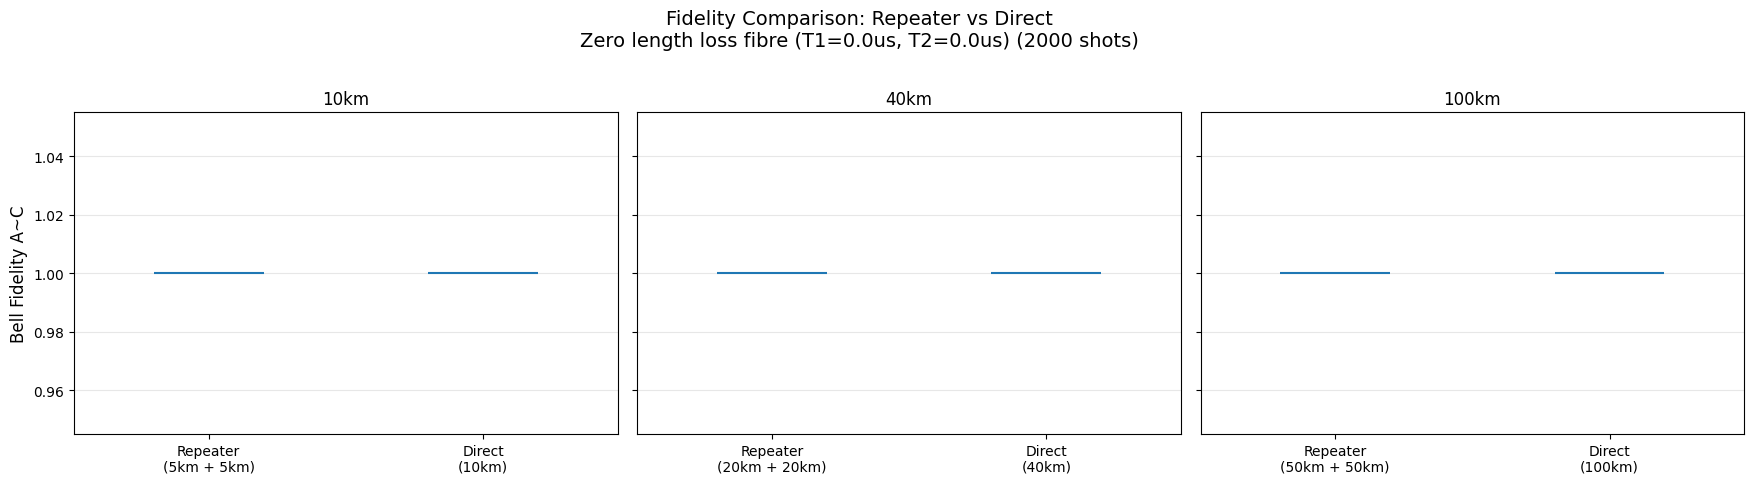

100km NOT found in direct results for High length loss fibre.


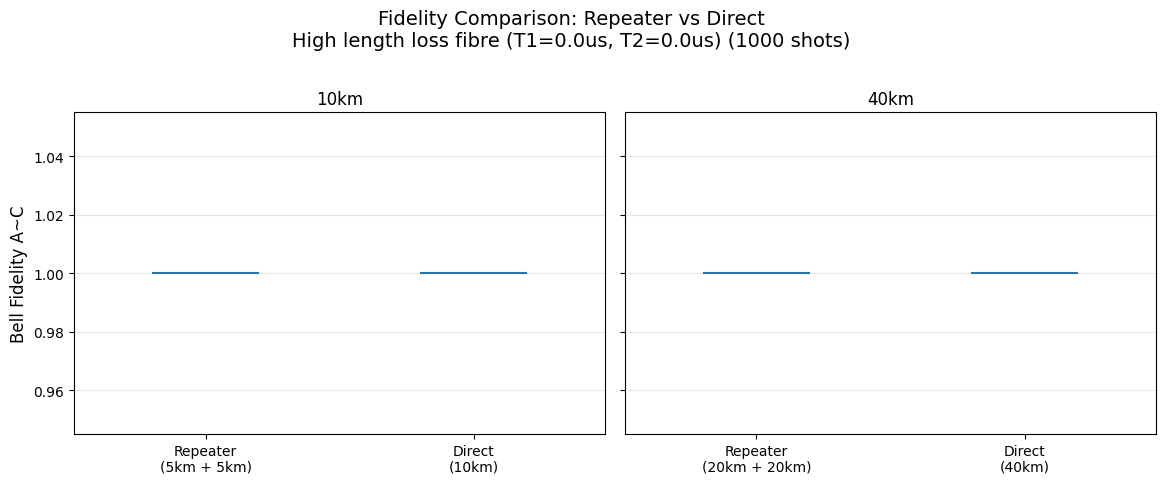

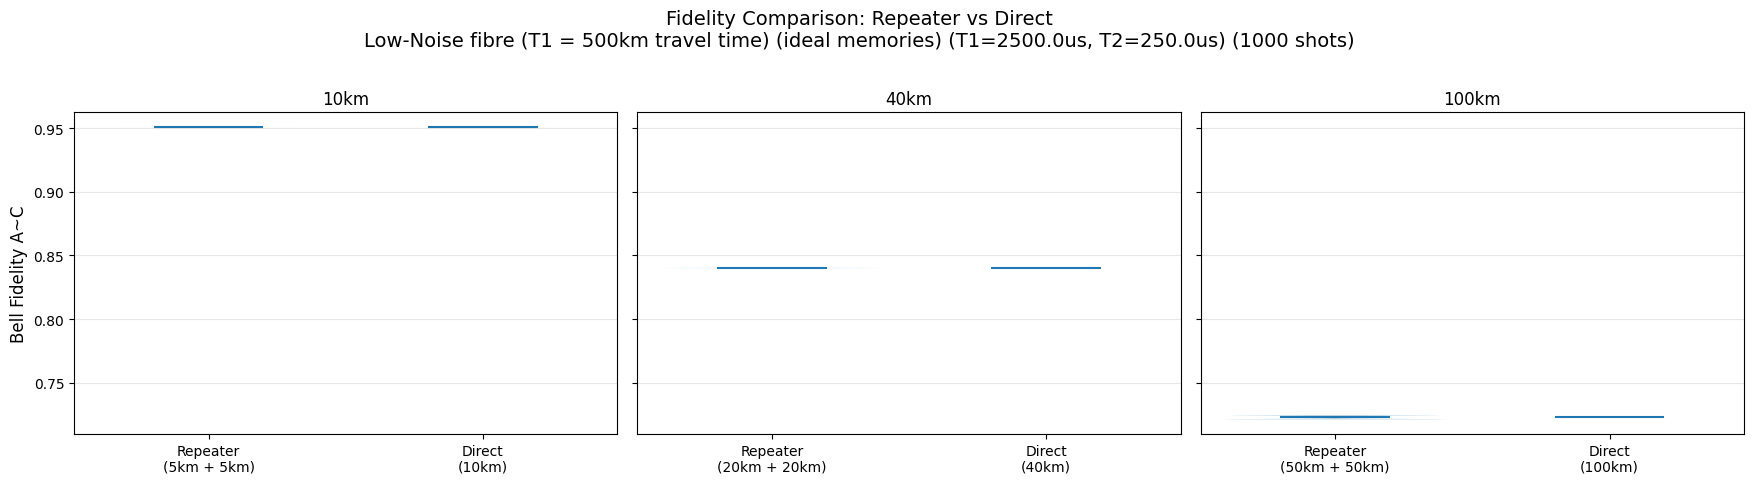

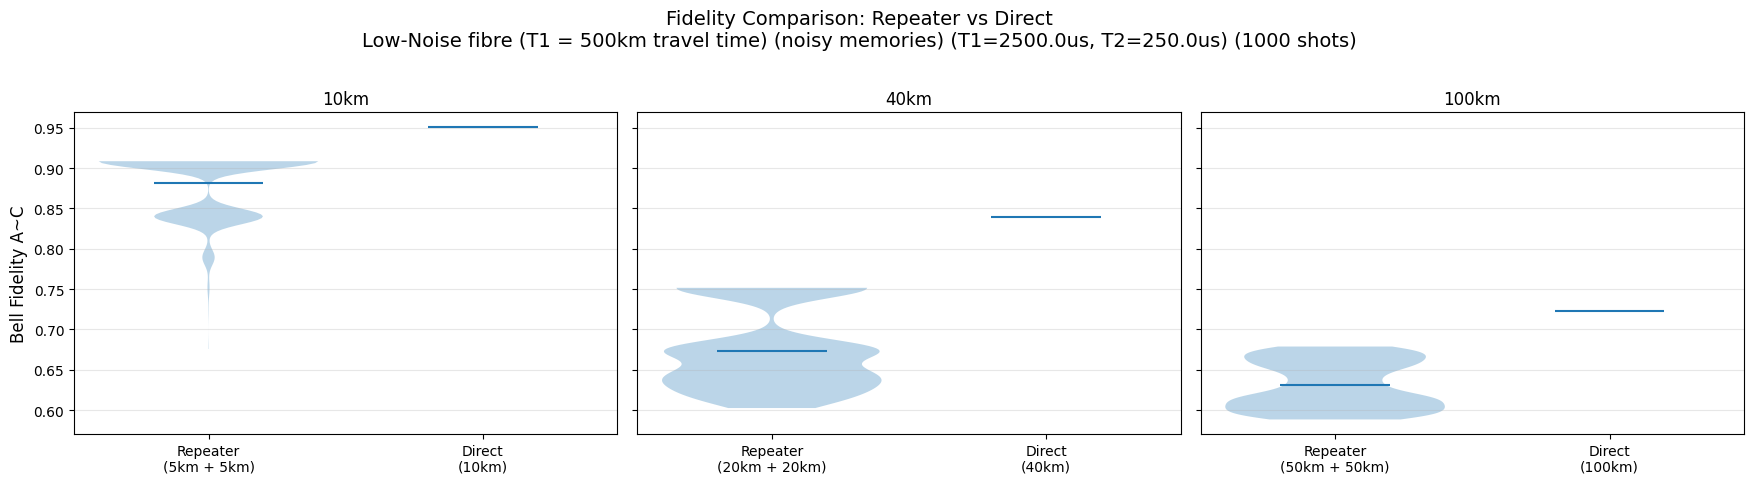

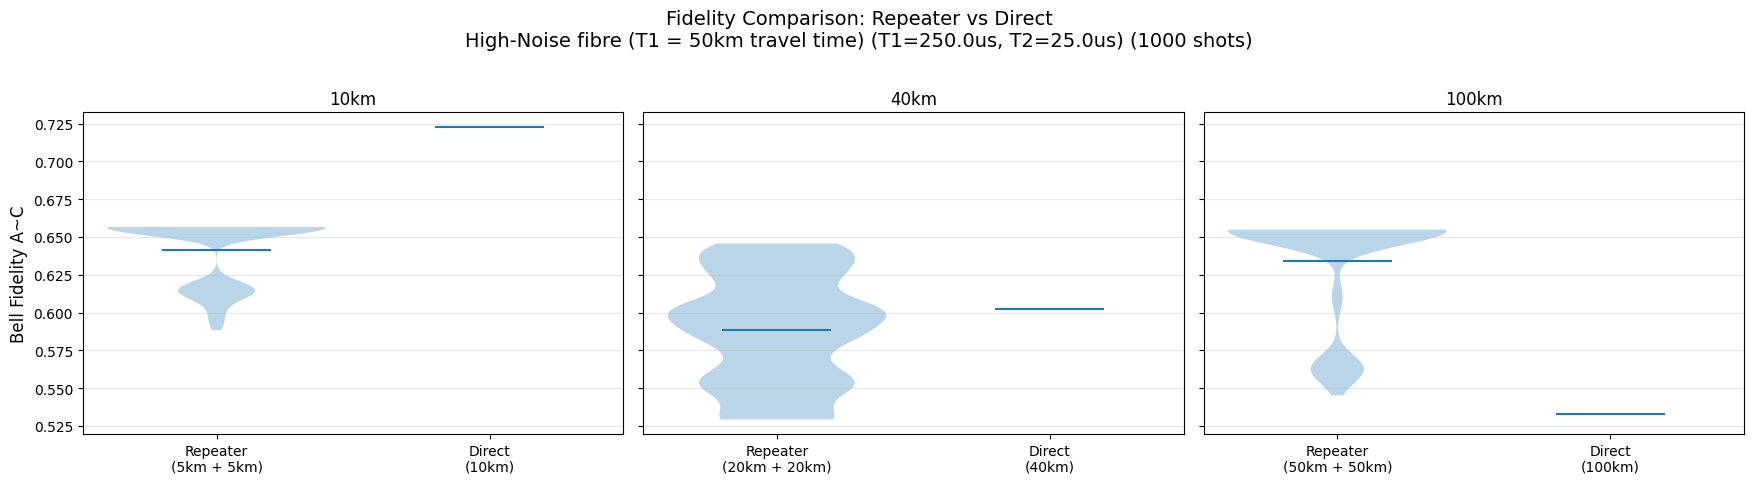

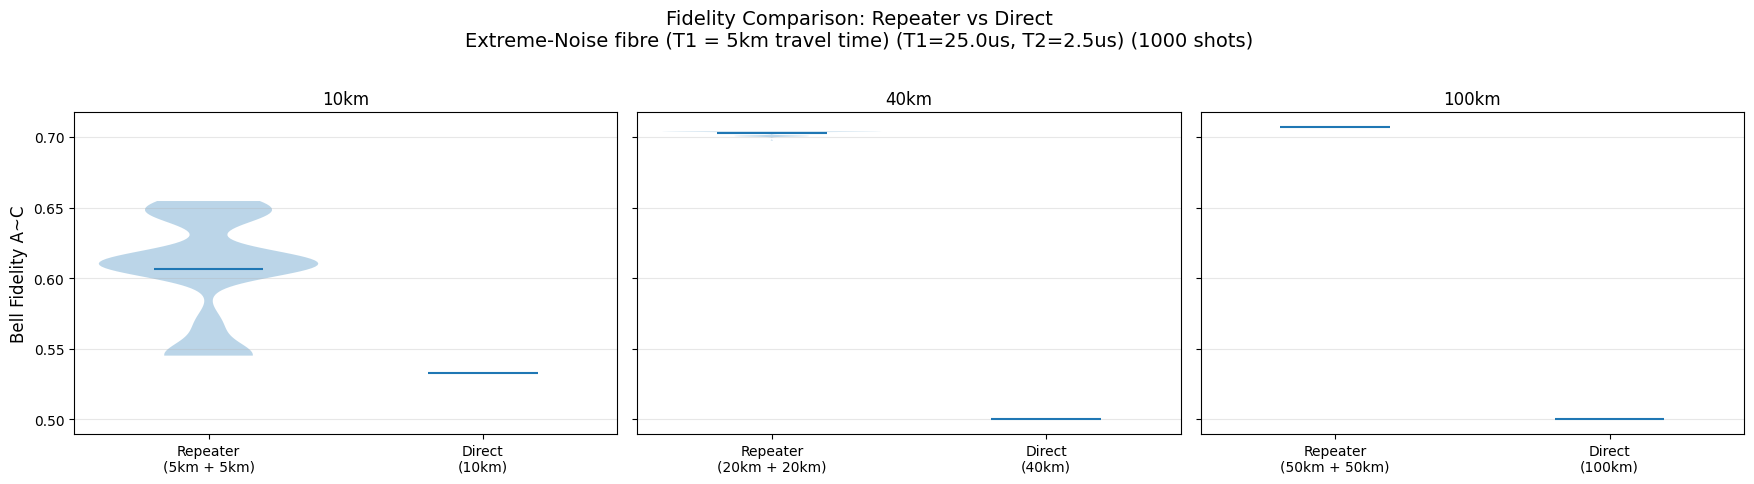

In [7]:
import sys, importlib

if 'plot_comparison' in sys.modules:
    comparison = importlib.reload(sys.modules['plot_comparison'])
else:
    import plot_comparison as comparison

comparison.plot_comparison(all_res_long, all_res_direct)